# Importing the required Libraries

In [1]:
# Importing libraries used for handling download and file management
import requests
import os
import shutil

# Importing libraries used for Data manipulation and analysis
import pandas as pd
import numpy as np
from datetime import datetime

# Importing libraries used for creating data visualizations and plots
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset into a dataframe


To ensure organized data management, it is essential to store data in a designated subfolder. My data is stored in a folder named `data.` You can easily access and download the data from the following link: [Data Download Link](https://drive.google.com/u/0/uc?id=1js5uNiHc67k6pIlauelMYh-kCmVrDfPN&export=download).

**Note:** The data is stored in a zip file and will need to be unzipped before use.

This structured approach not only promotes efficient data handling but also facilitates easy retrieval and sharing when needed.

The data includes:

| Variable              | Definition                                                  |
|-----------------------|-------------------------------------------------------------|
| state_code            | The state code of the state in which the start-up is located. |
| latitude              | The latitude of the start-up.                                |
| longitude             | The longitude of the start-up.                               |
| zip_code              | The zip code of the start-up.                                |
| id                    | A unique Identifier.                                         |
| city                  | The city in which the start-up is located.                   |
| name                  | The name of the start-up.                                   |
| labels                | Labels or categories associated with the start-up.           |
| founded_at            | The date when the start-up was founded.                      |
| closed_at             | The date when the start-up closed or ceased operations.      |
| first_funding_at      | The date of the first funding round for the start-up.        |
| last_funding_at       | The date of the most recent funding round for the start-up.   |
| age_first_funding_year| The number of years between founding and first funding.       |
| age_last_funding_year | The number of years between founding and last funding.        |
| age_first_milestone_year | The number of years between founding and the first significant milestone. |
| age_last_milestone_year  | The number of years between founding and the most recent significant milestone. |
| relationships         | The number of relationships or connections associated with the start-up. |
| funding_rounds        | The total number of funding rounds the start-up has gone through. |
| funding_total_usd     | The total amount of funding in USD received by the start-up. |
| milestones            | The total number of significant milestones achieved by the start-up. |
| state_code.1          | The state code of the state where the start-up is located.  |
| is_CA                 | A binary indicator (0 or 1) representing whether the start-up is located in California (CA). |
| is_NY                 | A binary indicator (0 or 1) representing whether the start-up is located in New York (NY). |
| is_MA                 | A binary indicator (0 or 1) representing whether the start-up is located in Massachusetts (MA). |
| is_TX                 | A binary indicator (0 or 1) representing whether the start-up is located in Texas (TX). |
| is_otherstate         | A binary indicator (0 or 1) representing whether the start-up is located in a state other than CA, NY, MA, or TX. |
| category_code         | The category or industry code associated with the start-up. |
| is_software           | A binary indicator (0 or 1) representing whether the start-up is in the software industry. |
| is_web                | A binary indicator (0 or 1) representing whether the start-up is in the web industry. |
| is_mobile             | A binary indicator (0 or 1) representing whether the start-up is in the mobile industry. |
| is_enterprise         | A binary indicator (0 or 1) representing whether the start-up operates in the enterprise sector. |
| is_advertising        | A binary indicator (0 or 1) representing whether the start-up is in the advertising industry. |
| is_gamesvideo         | A binary indicator (0 or 1) representing whether the start-up is in the games and video industry. |
| is_ecommerce          | A binary indicator (0 or 1) representing whether the start-up is in the e-commerce industry. |
| is_biotech            | A binary indicator (0 or 1) representing whether the start-up is in the biotech industry. |
| is_consulting         | A binary indicator (0 or 1) representing whether the start-up is in the consulting industry. |
| is_othercategory      | A binary indicator (0 or 1) representing whether the start-up falls into a category other than those listed above. |
| object_id             | A unique identifier for the start-up.                       |
| has_VC                | A binary indicator (0 or 1) representing whether the start-up has received venture capital (VC) funding. |
| has_angel             | A binary indicator (0 or 1) representing whether the start-up has received angel funding. |
| has_roundA            | A binary indicator (0 or 1) representing whether the start-up has completed a round A funding. |
| has_roundB            | A binary indicator (0 or 1) representing whether the start-up has completed a round B funding. |
| has_roundC            | A binary indicator (0 or 1) representing whether the start-up has completed a round C funding. |
| has_roundD            | A binary indicator (0 or 1) representing whether the start-up has completed a round D funding. |
| avg_participants      | The average number of participants in funding rounds for the start-up. |
| is_top500             | A binary indicator (0 or 1) representing whether the start-up is ranked among the top 500. |
| status                | The current status or condition of the start-up.             |

`Note:` The unnamed columns have been excluded from the table because their contents or labels are not known or specified.


In [2]:
def download_file(url, destination):
    response = requests.get(url, stream=True)
    parent_dir = "/".join(destination.split("/")[:-1])
    if not os.path.isdir(parent_dir):
      os.mkdir(parent_dir)
    if response.status_code == 200 and not os.path.isfile(destination):
        with open(destination, 'wb') as file:
            for chunk in response.iter_content(1024):
                file.write(chunk)
        print(f"File downloaded to {destination}")
    elif os.path.isfile(destination):
        print(f"File already downloaded")
    else:
        print(f"Failed to download the file")
    return parent_dir

def unzip_file(zip_file_path, extract_to_path):
    try:
        shutil.unpack_archive(zip_file_path, extract_to_path)
        print(f"Successfully extracted files from {zip_file_path}")
    except FileNotFoundError:
        print(f"Error: The ZIP file {zip_file_path} does not exist.")
    except shutil.ReadError:
        print(f"Error: {zip_file_path} is not a valid ZIP archive.")


In [3]:
# To download the file directly from the web.
download = True

if download:
    url = "https://drive.google.com/u/0/uc?id=1js5uNiHc67k6pIlauelMYh-kCmVrDfPN&export=download"
    destination = "./data/Startups Success Rate.zip"

    data_directory = download_file(url, destination)


    unzip_file(destination, data_directory)

startup_data = pd.read_csv("./data/startup data.csv")

File downloaded to ./data/Startups Success Rate.zip
Successfully extracted files from ./data/Startups Success Rate.zip


# Data Exploration
First let's look at the **First 5 rows** of our dataframe.

In [4]:
startup_data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


Then let's look at the **Last 5 rows** of the DataFrame

In [5]:
startup_data.tail()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired
922,462,CA,37.386778,-121.966277,95054,c:26702,Santa Clara,Santa Clara CA 95054,Asempra Technologies,1,...,c:26702,0,0,0,1,0,0,3.0000,1,acquired


By just looking at the data, we can see that it has some quality issues, but
let's continue our exploration and examine some general information about the
table.


In [6]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

The dataset has a lot of null values. These dataset needs to undergo data cleaning during the preprocessing stage. This will facilitate a smoother analysis and model creation process. Asides that all the columns appear to be in their correct datatypes which is great!<br>
Now, let's check for redundancies in the dataset<br>

In [7]:
# Checking for redundant rows by counting the number of duplicated rows in the Dataset.
print(sum(startup_data.duplicated()), "redundant rows")

# Checking for redundant columns by counting the number of duplicated columns in the dataframe.
print(sum(startup_data.T.duplicated()), "redundant columns")

0 redundant rows
1 redundant columns


Although our dataset doesn't have any redundant rows, It has redundant columns. To ensure a thorough and accurate analysis, it is essential to address the presence of redundant columns in the dataset. These redundant columns should be identified and removed as part of our data preprocessing steps.

Let's generate a statistical summary of the columns in the dataframe to better understand our data.


In [8]:
# Generating a statistical summary of the numerical columns in the dataset
startup_data.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [9]:
# Generating a statistical summary of the non-numerical columns in the dataset
startup_data.describe(include='object')

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
count,923,923,923,923,430,923,923,335,923,923,922,923,923,923
unique,35,382,922,221,252,922,217,202,585,680,35,35,922,2
top,CA,94107,c:28482,San Francisco,San Francisco CA 94105,Redwood Systems,1/1/2003,6/1/2013,1/1/2008,1/1/2008,CA,software,c:28482,acquired
freq,488,30,2,128,12,2,55,25,18,11,487,153,2,597


This statistical summary provides valuable insights into the dataset. For instance, it indicates that the `Unnamed: 0,` `id`, `name` and `object_id` columns may primarily serve as identifiers and may not add substantial value to our analysis. Therefore, it is advisable to consider removing these columns.<br>
Additionally, the summary suggests the possible existence of duplicate rows within the dataset.
Furthermore, It seems like the `zip_code,` `founded_at,` `closed_at,`	`first_funding_at` and `last_funding_at` are in the wrong datatype.

Before proceeding with data cleaning, let's conduct a thorough examination of the dataset to identify and address any duplicate rows.

In [10]:
startup_data.query('name=="Redwood Systems"')

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
124,506,CA,37.54827,-121.988572,94538,c:28482,Fremont,Fremont CA 94538,Redwood Systems,1,...,c:28482,1,0,1,1,1,0,2.25,1,acquired
832,505,CA,37.48151,-121.945328,94538,c:28482,Fremont,NaN,Redwood Systems,1,...,c:28482,1,0,1,1,1,0,2.25,1,acquired


It turns out our suspicion about the existence of a duplicate row was correct. The reason the earlier code couldn't detect it was due to the presence of a null value in the `Unnamed: 6` column of the duplicate row.

With this issue now confirmed, we can proceed with the data cleaning process.


# Data Cleaning

Now that we have gained a preliminary understanding of our dataset, it's time to proceed with the data cleaning process. During our data exploration, we identified several areas that require immediate attention:

1. **Handling Redundant Rows and Columns:** Redundant rows and columns will be removed from the dataset to ensure that each entry is unique and contributes to our analysis.

2. **Removing Identifiers:** We will remove columns that serve as identifiers, as they do not provide meaningful information for our analysis.

3. **Data Type Conversion:** We will convert columns to their correct data types to ensure consistency and accuracy in our analysis.

4. **Handling Null Values:** We will address null values, either by imputing missing data or making appropriate decisions based on the context of the dataset.

Let's now proceed with the data cleaning process to prepare the dataset for further exploration and analysis.

**1. Handling Redundant Rows and Columns:**<br>
To ensure that each entry in the dataset is unique and contributes to our analysis, it is essential to remove redundant rows and columns. As a result, the identified columns and rows will be removed.

In [11]:
# Checking for duplicate columns
duplicated_columns = startup_data.T.duplicated()

# Dropping duplicated columns
startup_data = startup_data.loc[:, ~duplicated_columns]

# Checking if the change has been implemented properly
print(startup_data.T.duplicated().sum(), "Redundant Columns")

0 Redundant Columns


Let's move on to dealing with the duplicate rows.

In [12]:
# Checking the duplicate row
startup_data.query('name=="Redwood Systems"')

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
124,506,CA,37.54827,-121.988572,94538,c:28482,Fremont,Fremont CA 94538,Redwood Systems,1,...,1,1,0,1,1,1,0,2.25,1,acquired
832,505,CA,37.48151,-121.945328,94538,c:28482,Fremont,NaN,Redwood Systems,1,...,1,1,0,1,1,1,0,2.25,1,acquired


In [13]:
# Removing the specific row by index
row_to_remove = 832
startup_data = startup_data.drop(index=row_to_remove)

# Checking to see if the change has been properly implemented
startup_data.query('name=="Redwood Systems"')

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
124,506,CA,37.54827,-121.988572,94538,c:28482,Fremont,Fremont CA 94538,Redwood Systems,1,...,1,1,0,1,1,1,0,2.25,1,acquired


Let's now get to the next issue now that these has been taken care of.

**2. Removing Identifiers**<br>
The `Unnamed: 0,` `id,` `name` and `object_id` columns primarily serve as identifiers and may not add substantial value to our analysis. They therefore have be removed.

**Note:**<br>
The `object_id` columns has already been removed.

In [14]:
# deleting the Unnamed: 0, id and object_id columns
identifier_columns = ['Unnamed: 0', 'id', 'name']
startup_data = startup_data.drop(columns=identifier_columns)

# checking if the changes have been implemented.
for i in identifier_columns:
  if i not in startup_data.columns:
    print("Successfully deleted the", i, 'column')

Successfully deleted the Unnamed: 0 column
Successfully deleted the id column
Successfully deleted the name column


Now that the changes have been implemented, let's proceed.

**3. Data Type Conversion:**

It seems like the `zip_code,` `founded_at,` `closed_at,` `first_funding_at` and `last_funding_at` are in the wrong datatype. We will rectify the incorrect data types in the dataset, ensuring consistency and precision in our analysis. <br>
Let's start with the `zip_code` column.

In [15]:
# Extracting only the numerical characters in the dataset.
startup_data.zip_code = startup_data.zip_code.str.extract("(\d+)")

# Converting Zip_code to the correct datatype
startup_data.zip_code = startup_data.zip_code.astype(int)

# Checking if the changes have been implemented
startup_data.zip_code.dtype

dtype('int64')

Let's confidently proceed to address the remaining column that should be in the datetime datatype rather than a string.

In [16]:
# Converting the founded_at, closed_at, first_funding_at and last_funding_at to the datetime dataype
datetime_columns = ["founded_at", "closed_at", "first_funding_at", "last_funding_at"]
for column in datetime_columns:
  startup_data[column] = pd.to_datetime(startup_data[column])



# Checking if the changes have been implemented
startup_data[datetime_columns].dtypes

founded_at          datetime64[ns]
closed_at           datetime64[ns]
first_funding_at    datetime64[ns]
last_funding_at     datetime64[ns]
dtype: object

Now that has been taken care of, let's proceed.

**4. Handling Null Values**

The dataset has alot of columns with missing values. We will address null values, either by imputing missing data or making appropriate decisions based on the context of the dataset.

In [17]:
# Creating a dataframe of the columns with missing values, the number of missing values and their datatype
missing_df = pd.DataFrame(startup_data.isna().sum().sort_values(ascending=False).reset_index())
missing_df.columns  = ["column", "Count"]
missing_df = missing_df.query("Count > 0")
missing_df["Datatype"] = startup_data[missing_df.column].dtypes.values
missing_df

,column,Count,Datatype
0,closed_at,587,datetime64[ns]
1,Unnamed: 6,492,object
2,age_last_milestone_year,152,float64
3,age_first_milestone_year,152,float64
4,state_code.1,1,object


Prior to any data cleaning, we will initially examine the `closed_at` and `Unnamed: 6` columns, given their significant presence of missing values.<br>
Let's start with the `closed_at` columns.

In [18]:
# Inspecting the `closed_at` column
startup_data[startup_data.closed_at.isna()].head()

,state_code,latitude,longitude,zip_code,city,Unnamed: 6,labels,founded_at,closed_at,first_funding_at,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,San Diego,NaN,1,2007-01-01,NaT,2009-04-01,...,1,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,95032,Los Gatos,NaN,1,2000-01-01,NaT,2005-02-14,...,0,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,92121,San Diego,San Diego CA 92121,1,2009-03-18,NaT,2010-03-30,...,0,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,95014,Cupertino,Cupertino CA 95014,1,2002-01-01,NaT,2005-02-17,...,0,0,0,0,1,1,1,3.3333,1,acquired
6,CA,37.391559,-122.070264,94041,Mountain View,NaN,1,2005-01-01,NaT,2006-09-21,...,0,1,0,1,1,0,0,1.6667,1,acquired


We've identified a discernible pattern in the `status` column. Let's thoroughly investigate this pattern before drawing any conclusions.

In [19]:
# Inspecting the  `status` column
startup_data[startup_data.closed_at.isna()].status.unique()

array(['acquired'], dtype=object)

It's evident that the `closed_at` column contains missing values for companies with the `acquired` status. We won't incorporate this column into our model to prevent it from relying excessively on a single feature. It's a prudent decision not to include it in the data used to train our model. However We can still utilize it for our analysis. <br>Addressing missing values does not appear to be a top priority, as the `closed_at` column will be removed after our analysis.

Now let's check the `Unnamed: 6` column

In [20]:
startup_data['Unnamed: 6'].head()

0                       NaN
1                       NaN
2        San Diego CA 92121
3        Cupertino CA 95014
4    San Francisco CA 94105
Name: Unnamed: 6, dtype: object

The `Unnamed: 6` column primarily consists of city and zip code data , But of which are in our dataset. The `Unnamed: 6` column offers no new insight to use and should be removed.

In [21]:
# Deleting the Unnamed: 6 column.
startup_data = startup_data.drop(columns=['Unnamed: 6'])

# Checking if the changes have been implemented
print('Unnamed: 6' in startup_data.columns)

False


While addressing missing values, it's worth noting that the `Unnamed: 6` column will be removed from our dataset as it does not appear to be a top priority for our analysis. With this decision made, let's shift our focus to the remaining columns.

Let's start with the `age_first_milestone_year` and `age_last_milestone_year` columns.

In [22]:
missing_df

,column,Count,Datatype
0,closed_at,587,datetime64[ns]
1,Unnamed: 6,492,object
2,age_last_milestone_year,152,float64
3,age_first_milestone_year,152,float64
4,state_code.1,1,object


In [23]:
# Inspecting the age_first_milestone_year and age_last_milestone_year columns.
startup_data[['age_first_milestone_year', 'age_last_milestone_year']].head()

,age_first_milestone_year,age_last_milestone_year
0,4.6685,6.7041
1,7.0055,7.0055
2,1.4575,2.2055
3,6.0027,6.0027
4,0.0384,0.0384


When dealing with numerical columns like these, we have the option to fill missing values using either the mean or the mode. In our specific case, as we fill these missing values, we will also create an additional column to track the values that have been filled in.

In [24]:
# Creating function that helps with the imputing
def filler_func(x, mean):
  x = str(x)
  if x == 'nan':
    x, y = mean, 1
  else:
    x, y=float(x), 0
  return x, y

def value_getter(data, column):
  mean_value = data[column].mean()
  value_list = data[column].apply(lambda x: filler_func(x, mean_value)).to_list()
  value_list = [j for i in value_list for j in i]
  return value_list

In [25]:
# Imputing the values and splitting them into two different columns
value_list = value_getter(startup_data, 'age_first_milestone_year')
startup_data['age_first_milestone_year'] = value_list[::2]
startup_data['age_first_milestone_year_filled'] = value_list[1::2]

In [26]:
# Imputing the values and splitting them into two different columns
value_list = value_getter(startup_data, 'age_last_milestone_year')
startup_data['age_last_milestone_year'] = value_list[::2]
startup_data['age_last_milestone_year_filled'] = value_list[1::2]

# Checking if the changes have been implemented
startup_data[['age_first_milestone_year', 'age_last_milestone_year']].isna().sum()

age_first_milestone_year    0
age_last_milestone_year     0
dtype: int64

Now that we've covered the current topic, let's shift our focus to the next column, `state_code.1`.

In [27]:
# Inspecting the state_code.1 column
startup_data['state_code.1'].head()

0    CA
1    CA
2    CA
3    CA
4    CA
Name: state_code.1, dtype: object

It seems that this column bears a strong resemblance to the `state_code` column. To determine if this is a duplicate column, let's conduct a comparison between the two.

In [28]:
(startup_data['state_code.1'] == startup_data['state_code']).sum()

921

It appears our suspicion was correct: the `state_code.1` column is simply a duplicate of the `state_code` column. Therefore, we must remove the `state_code.1` column, as it serves no additional purpose and is redundant.

In [29]:
# Deleting the `state_code.1`.
startup_data = startup_data.drop(columns='state_code.1')

# checking to see if the change has been implemented
print('state_code.1' in startup_data.columns)

False


Now that all the necessary changes have been made, let's take a closer look at our dataset.

In [30]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 0 to 922
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   state_code                       922 non-null    object        
 1   latitude                         922 non-null    float64       
 2   longitude                        922 non-null    float64       
 3   zip_code                         922 non-null    int64         
 4   city                             922 non-null    object        
 5   labels                           922 non-null    int64         
 6   founded_at                       922 non-null    datetime64[ns]
 7   closed_at                        335 non-null    datetime64[ns]
 8   first_funding_at                 922 non-null    datetime64[ns]
 9   last_funding_at                  922 non-null    datetime64[ns]
 10  age_first_funding_year           922 non-null    float64      

Asides the `Unnamed: 6` and `closed_at` columns, all the changes have been implemented and everything looks like it is in order. Now let's proceed.

# Data Visualization

Let's first create a function for the labelling of our graphs

In [31]:
def labelling(data, text=True, save=False, figsize=(6, 4), dpi=120, kind="bar", title="", y="", x='',
              draw=True):
    if draw:
      plt.figure(figsize=figsize, dpi=dpi)
      data.plot(kind=kind)
    if text:
        for index, value in enumerate(data):
            plt.text(index, value, str(value), ha='center', va='bottom')
    if save:
        plt.savefig('./viz/sample_plot_1.png', dpi=300, bbox_inches='tight')
    plt.title(title.title())
    plt.ylabel(y.title())
    plt.xlabel(x.title())


Let's commence our analysis by examining the `status` variable to gain a more comprehensive understanding of it.

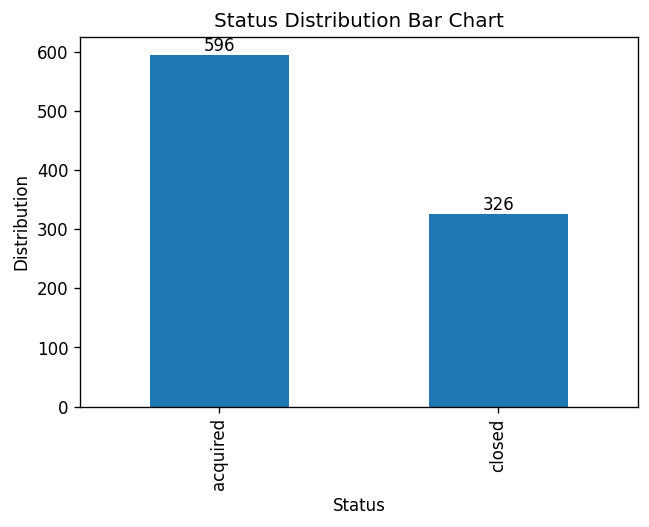

In [32]:
labelling(startup_data.status.value_counts(), title="Status Distribution Bar Chart", y = "Distribution",
          x="Status", text=True);

From the graph, it's clear that the majority of startups in our dataset have achieved success. This observation highlights a significant disparity between the number of successful startups and those that did not succeed within the dataset. This valuable insight serves as a foundation for making data-driven decisions and conducting further in-depth analyses.

Let's shift our focus to the `state_code` column

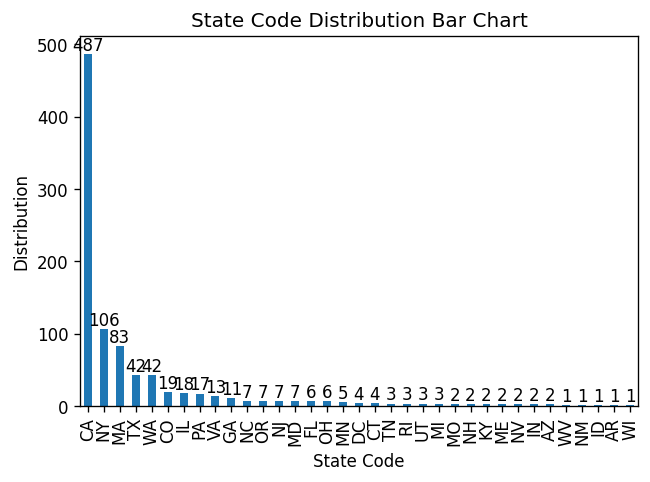

In [33]:
labelling(startup_data.state_code.value_counts(), title="State code Distribution Bar Chart", y = "Distribution",
          x="State code", text=True)
plt.xticks(rotation=90);

Analyzing the graph above, it becomes evident that `California` stands out with the highest number of startups in the dataset. Additionally, `New York` and `Massachusetts` also exhibits a significant presence of startups. This graphical representation strongly suggests that these three states could be considered commercial hubs and potential 'hotspots' for startup activity.

Let's Inspect the startup activity in the state of `California`

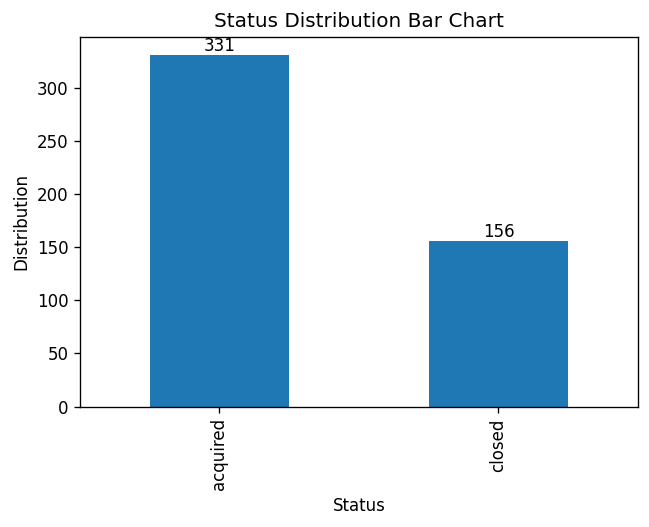

In [34]:
labelling(startup_data.query('state_code == "CA"').status.value_counts(), title="Status Distribution Bar Chart", y = "Distribution",
          x="Status", text=True);

Based on the graph above, it's evident that the likelihood of a startup closing in `California` is less than 50%. This closure rate stands in contrast to the overall closure rate of over 50% observed in the entire dataset. While this discrepancy might suggest that opening a business in California is more favorable for entrepreneurs than in other states, it's essential not to jump to conclusions hastily. To gain a comprehensive understanding, let's analyze the startup success rates of all other states.

In [35]:
def success_rate(data, column, complete=False):
  df = (data.query('status == "acquired"').groupby(column)['status'].value_counts() / startup_data.groupby(column)['status'].count()) * 100
  df = pd.DataFrame(df)
  if complete:
    # Getting the column and success rates seperately
    columns = sorted(data.query('status == "acquired"')[column].unique())
    success_rate = np.array([j for i in df.values for j in i])
    count = np.array(data.query('status == "acquired"').groupby(column)['status'].count())/ (success_rate/100)

    # Creating a new dataframe and putting in the values
    df = pd.DataFrame()
    df[column] = columns
    df['Success_rate'] = success_rate
    df['Count'] = count
    df = df.sort_values(by="Success_rate", ascending=False)

  return df


state_code_df = success_rate(startup_data, "state_code", complete=True)

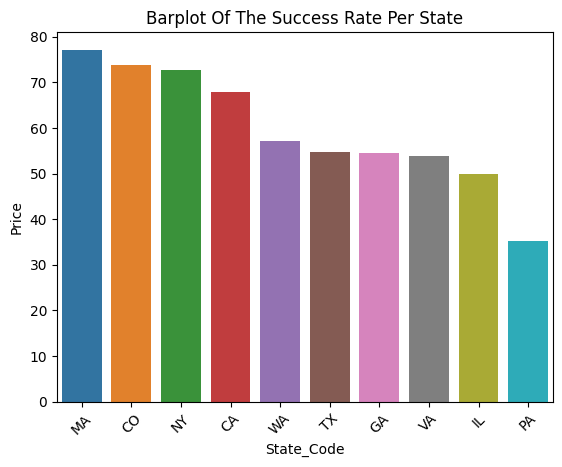

In [36]:
# Creating a barplot showing the success rate per state
sns.barplot(x="state_code", y='Success_rate', data=state_code_df.query("Count>10"))
plt.xticks(rotation=45)
labelling('', title='Barplot of the success rate per state', y = 'Price', x="state_code", text=False, draw=False);

The graph provides a visual representation of startup success rates, specifically focusing on states with more than 10 startups. We have set this threshold because lower counts often lack the statistical significance required for meaningful generalizations. By doing so, we aim to concentrate our analysis on states with a substantial startup presence.

From the graph, we can observe that `Massachusetts` leads the pack with the highest success rate, closely followed by `Colorado.` This observation is particularly valuable for entrepreneurs seeking to establish their startups.

However, this graph not only highlights successful states but also prompts important questions. Why do these states exhibit such high success rates? What strategies or factors contribute to their success? These inquiries open the door to further exploration and research which cannot be done now due to the limitations of the dataset but if conducted properly can potentially providing valuable insights for aspiring entrepreneurs.

Now let's briefly take a look at our dataset

In [37]:
startup_data.head()

,state_code,latitude,longitude,zip_code,city,labels,founded_at,closed_at,first_funding_at,last_funding_at,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,age_first_milestone_year_filled,age_last_milestone_year_filled
0,CA,42.358880,-71.056820,92101,San Diego,1,2007-01-01,NaT,2009-04-01,2010-01-01,...,1,0,0,0,0,1.0000,0,acquired,0,0
1,CA,37.238916,-121.973718,95032,Los Gatos,1,2000-01-01,NaT,2005-02-14,2009-12-28,...,0,0,1,1,1,4.7500,1,acquired,0,0
2,CA,32.901049,-117.192656,92121,San Diego,1,2009-03-18,NaT,2010-03-30,2010-03-30,...,0,1,0,0,0,4.0000,1,acquired,0,0
3,CA,37.320309,-122.050040,95014,Cupertino,1,2002-01-01,NaT,2005-02-17,2007-04-25,...,0,0,1,1,1,3.3333,1,acquired,0,0
4,CA,37.779281,-122.419236,94105,San Francisco,0,2010-08-01,2012-10-01,2010-08-01,2012-04-01,...,1,0,0,0,0,1.0000,1,closed,0,0


After a closer examination of the provided table, it becomes apparent that both the `Labels` and `status` columns contain similar data, albeit in different formats. Specifically, the `labels` column appears to replicate the information found in the `status` column, albeit in a numerical representation. Before making any decisions or taking action based on this observation, it is essential to validate our hypothesis.

In [38]:
(startup_data.labels == startup_data.status.apply(lambda x: 1 if x=="acquired" else 0)).all()

True

It appears that our initial theory is indeed correct: the `labels` column is redundant and should be removed.

In [39]:
# Deleting the `labels`.
startup_data = startup_data.drop(columns='labels')

# checking to see if the change has been implemented
print('labels' in startup_data.columns)

False


Now that we've addressed that, let's shift our focus to the `city` column.

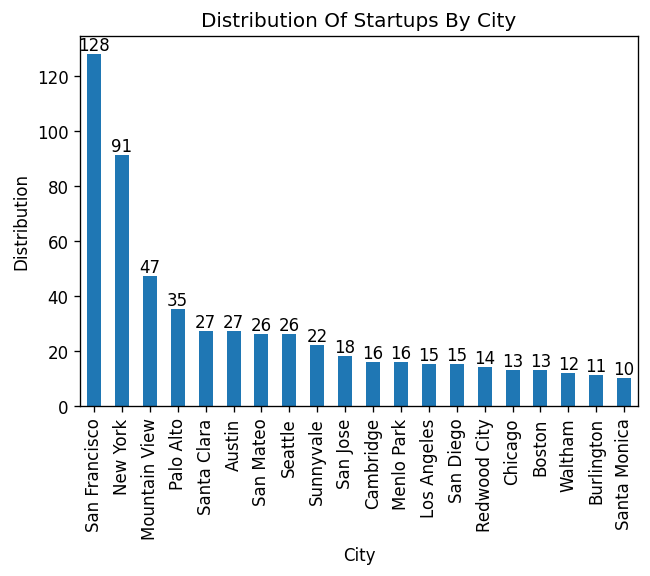

In [40]:
labelling(startup_data.city.value_counts()[:20], title="Distribution of startups by City", y = "Distribution",
          x="city", text=True)
plt.xticks(rotation=90);

Upon analyzing the graph depicted above, a clear pattern emerges: `San Francisco` prominently leads the dataset with the highest concentration of startups. Furthermore, `New York` and `Mountain View` also demonstrate substantial startup activity.

This graphical depiction strongly indicates that these three regions may be regarded as thriving commercial hubs and potential 'hotspots' for startup endeavors. It is plausible that these areas boast advanced infrastructure and vibrant entrepreneurial ecosystems compared to other cities, making them attractive destinations for emerging businesses.

Let's carry on and shift our focus to the `founded_at,` `closed_at,` `first_funding_at` and `last_funding_at.`

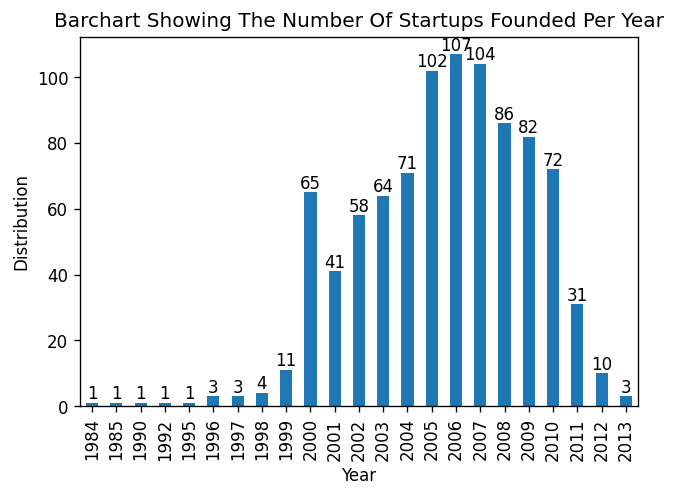

In [41]:
labelling(startup_data.founded_at.dt.year.value_counts().sort_index(), title="Barchart showing the number of startups founded per year", y = "Distribution",
          x="year", text=True)
plt.xticks(rotation=90);

Upon analyzing the graph above, a noticeable trend emerges: the number of startups founded each year exhibited steady growth until the year 2013. However, an intriguing disruption in this trend occurred in 2014. This raises pivotal questions: What factors contributed to this shift in 2014? What strategies can be implemented to revert to the previous upward trajectory?

These questions serve as a catalyst for deeper exploration and research. While the current dataset imposes limitations on our ability to provide immediate answers, a thorough investigation holds the potential to yield invaluable insights for aspiring entrepreneurs. Conducting such research, when properly executed, can shed light on the underlying dynamics of the startup ecosystem and offer guidance for future endeavors.

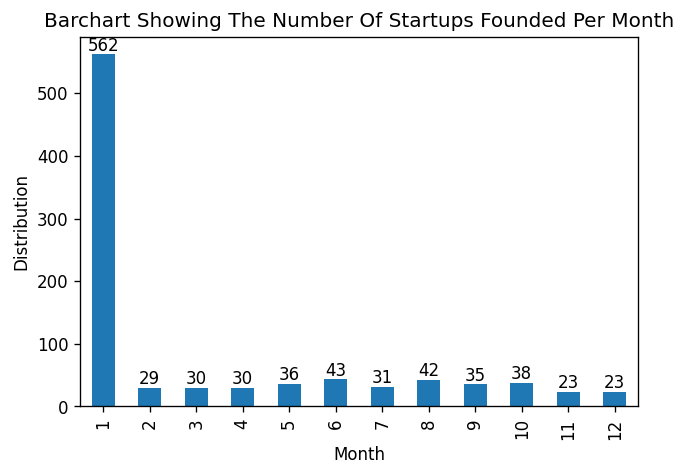

In [42]:
labelling(startup_data.founded_at.dt.month.value_counts().sort_index(), title="Barchart showing the number of startups founded per month", y = "Distribution",
          x="month", text=True)
plt.xticks(rotation=90);

When we take a look at the graph, something interesting pops out - there's a sudden surge in the number of startups getting off the ground in January. But here's the twist: apart from that January spike, the number of new startups being founded each month seems to chug along at a steady pace.

Now, this makes you wonder:

- What's so special about January?
- Why do so many entrepreneurs kickstart their ventures then?

These are important questions that deserve some thought. Unfortunately, our dataset has its limits, so we can't dig deeper right now. But here's the exciting part: if we could, we might uncover valuable insights that could really help out aspiring business owners.

So, let's take it one step further and check out how the number of startups stacks up day by day within the month.

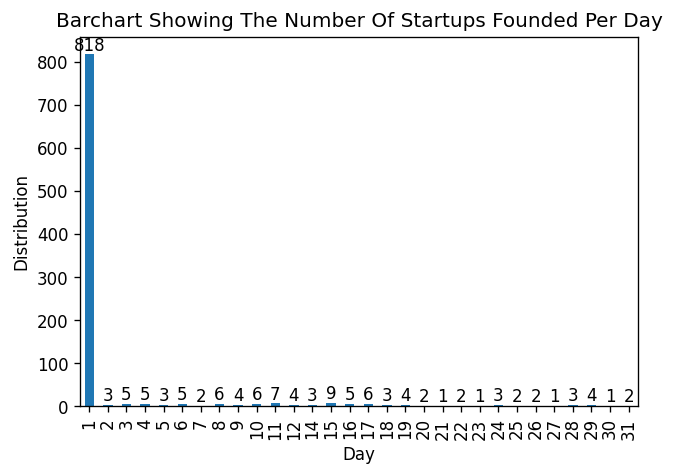

In [43]:
labelling(startup_data.founded_at.dt.day.value_counts().sort_index(), title="Barchart showing the number of startups founded per day", y = "Distribution",
          x="day", text=True)
plt.xticks(rotation=90);

In the graph above, it's evident that the majority of startups were established primarily at the commencement of each month. With the exception of the 1st day of each month, the founding rate on the remaining days maintains a relatively steady pattern.

Now, let's redirect our attention to the `closed_at` column.

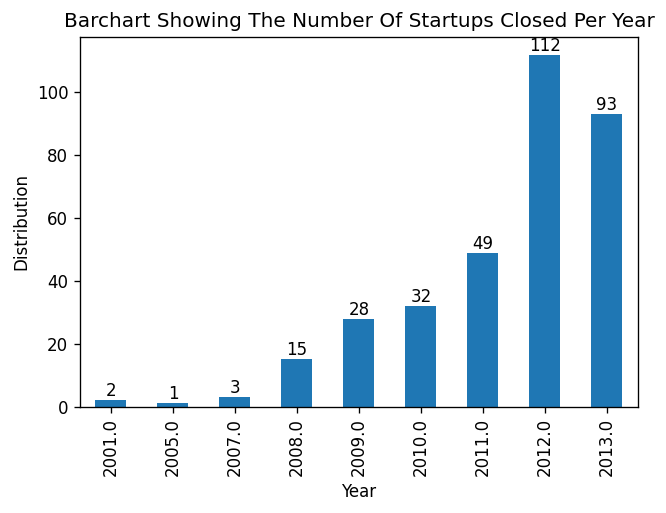

In [44]:
labelling(startup_data.closed_at.dt.year.value_counts().sort_index(), title="Barchart showing the number of startups closed per year", y = "Distribution",
          x="year", text=True)
plt.xticks(rotation=90);

Upon examining the graph above, we notice a striking resemblance to the trend observed in the graph depicting the number of startups founded per year. Specifically, we observe a consistent rise in the annual closure of startups until the year 2013. This phenomenon raises a significant question: What transpired in 2013 that interrupted this trend?

These inquiries naturally invite further exploration and research. However, it's important to acknowledge that the current dataset has certain limitations that hinder us from conducting a comprehensive analysis. Nonetheless, if properly undertaken in the future, this research has the potential to yield valuable insights for aspiring entrepreneurs.

Understanding the reasons behind the change in closure trends can offer valuable lessons and inform strategies for those looking to thrive in the startup landscape.

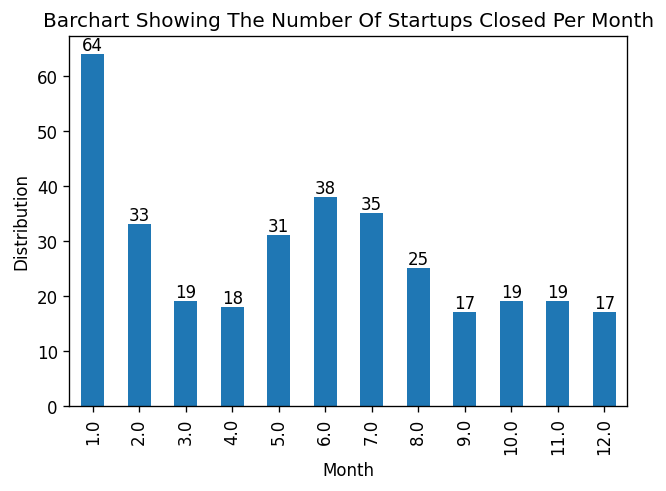

In [45]:
labelling(startup_data.closed_at.dt.month.value_counts().sort_index(), title="Barchart showing the number of startups closed per month", y = "Distribution",
          x="month", text=True)
plt.xticks(rotation=90);

While this graph exhibits a somewhat more balanced distribution, it remains evident that there is a disproportionally high number of business closures in the month of January. However, it's important to note that the dataset lacks sufficient data to fully interpret the significance of this trend.

To further our analysis, let's shift our focus to the `first_funding_at` and `last_funding_at` columns.

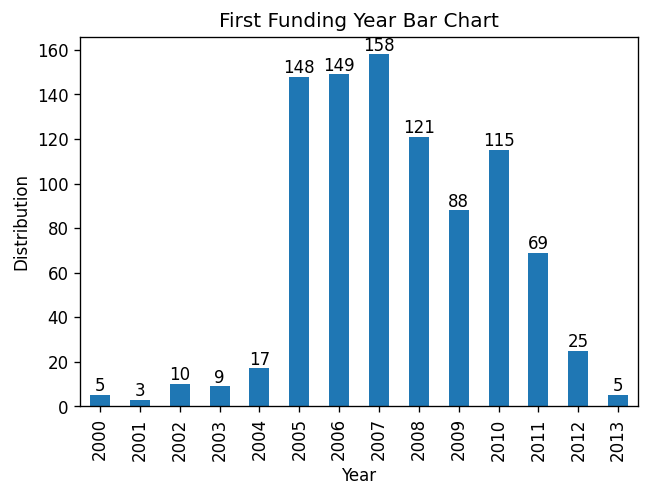

In [46]:
labelling(startup_data.first_funding_at.dt.year.value_counts().sort_index(), title="First Funding Year Bar Chart", y = "Distribution",
          x="year", text=True)
plt.xticks(rotation=90);

The current graph exhibits similarities to the previously plotted `Barchart showing the number of startups founded per year.` This graph specifically showcases the years in which startups received their initial funding rounds. Notably, there is a prominent peak in the year `2007,'`which corresponds with the previous graph we discussed, where the most significant spike occurred in `2006,` followed closely by `2007.`

With this observation in mind, let's proceed to the next stage of our analysis.

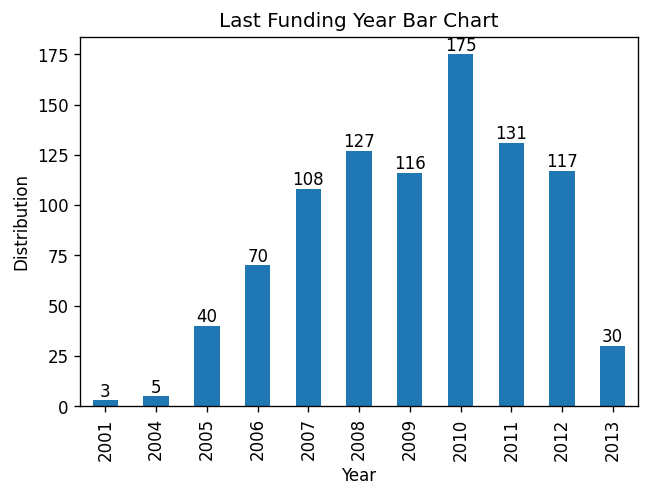

In [47]:
labelling(startup_data.last_funding_at.dt.year.value_counts().sort_index(), title="Last Funding Year Bar Chart", y = "Distribution",
          x="year", text=True)
plt.xticks(rotation=90);

As we analyze the graph provided, a striking pattern emerges: there is a consistent upward trajectory in the annual last funding of startups until the year `2010`. This observation prompts a critical question: What events occurred in `2010` that disrupted this trend? Does the 'last funding' year imply that the startup ceased its operations?

These questions naturally pique our curiosity, inviting further investigation and research. However, it's essential to acknowledge that the current dataset possesses certain limitations that constrain our ability to conduct a comprehensive analysis. Nevertheless, if approached methodically in the future, this research holds the potential to uncover valuable insights for aspiring entrepreneurs.

Now, let's move on to our next column of interest.

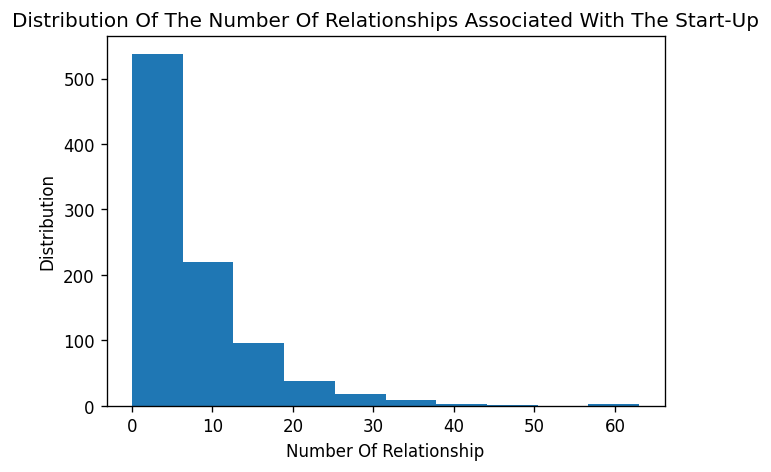

In [48]:
labelling(startup_data.relationships, kind='hist', title="Distribution of the number of relationships associated with the start-up", y = "Distribution",
          x="number of relationship", text=False);

Most startups typically have fewer than 20 connections or relationships, indicating the prevalence of limited networking. This observation highlights the importance of understanding these connections for evaluating growth potential and strategic positioning. Additionally, it underscores the significance of building strong networks and partnerships for startup success and innovation. Further analysis may reveal insights into the quality and diversity of these connections.

For the time being, let's proceed with our data exploration.

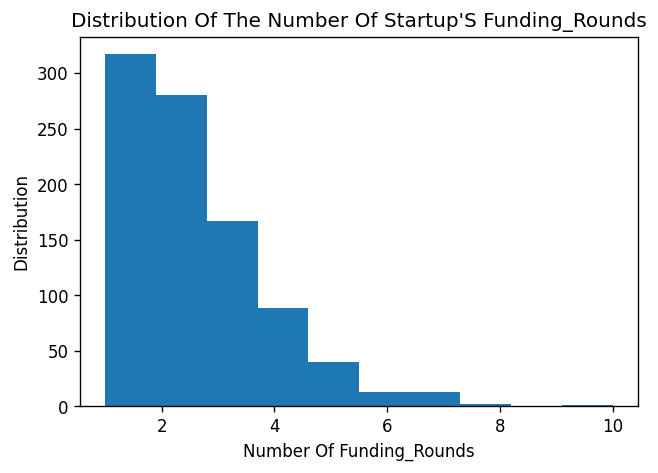

In [49]:
labelling(startup_data.funding_rounds, kind='hist', title="Distribution of the number of startup's funding_rounds", y = "Distribution",
          x="number of funding_rounds", text=False);

Many companies typically undergo fewer than five funding rounds. To explore the potential impact of the number of funding rounds on a startup's success, we will conduct a concise investigation.

In [50]:
# Creating a dataframe of the success rates of the funding rounds
funding_rounds_success_rates = success_rate(startup_data, "funding_rounds", complete=False)

<Figure size 720x480 with 0 Axes>

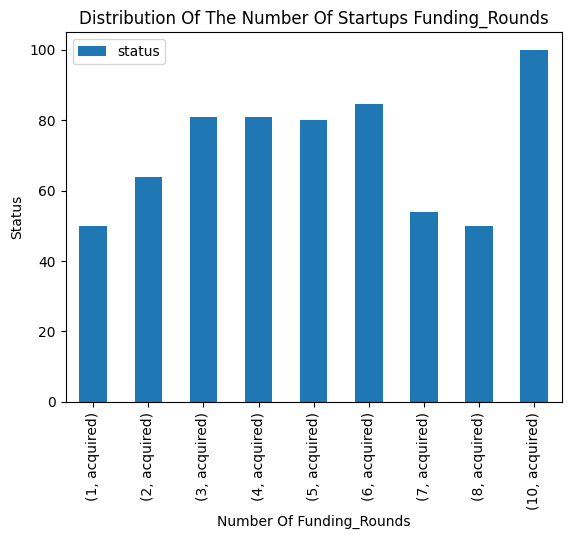

In [51]:
labelling(funding_rounds_success_rates, kind='bar', title="Distribution of the number of startups funding_rounds", y = "status",
          x="number of funding_rounds", text=False);

The graph reveals a discernible trend: as startups accumulate more funding rounds, their likelihood of success increases. This upward trajectory is observable up to the seventh funding round. However, it's worth noting that this trend might be subject to certain limitations, possibly due to insufficient data or other unidentified factors.

Furthermore, the graph highlights that companies with the highest number of funding rounds also exhibit the highest probability of success. Nevertheless, it's important to exercise caution and avoid hasty conclusions at this stage.

Now let's shift our focus to the next column of interest

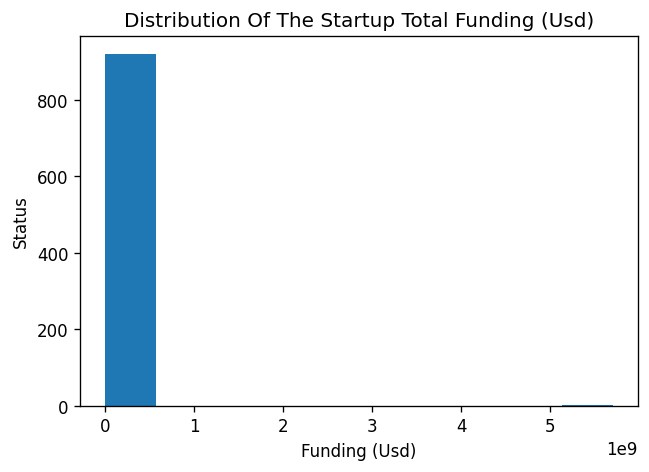

In [52]:
labelling(startup_data.funding_total_usd, kind='hist', title="Distribution of the startup total funding (usd)", y = "status",
          x="funding (usd)", text=False);

We have observed potential outliers in the dataset. To address this issue effectively, our initial step is to conduct a thorough investigation to pinpoint the root causes. Once we have a clear understanding of the outliers' nature, we can determine the appropriate course of action.

In [53]:
startup_data.query("funding_total_usd > 1e9")['funding_total_usd']

364    5700000000
Name: funding_total_usd, dtype: int64

The presence of this exceptionally large outlier warrants its removal from our dataset. By doing so, we can ensure that our model is not trained on data that is heavily influenced by outliers, promoting a more robust and accurate model.

In [54]:
# Removing the row with the outlier
startup_data = startup_data.drop(364)

Now that we've addressed the outlier, let's proceed to replot our graph and take another close look at it.

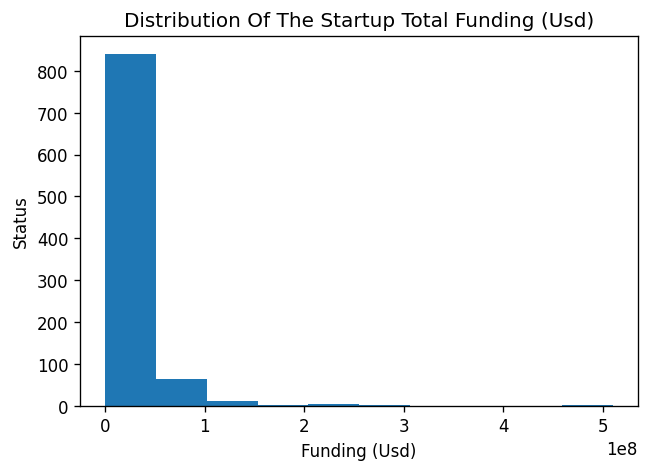

In [55]:
labelling(startup_data.funding_total_usd, kind='hist', title="Distribution of the startup total funding (usd)", y = "status",
          x="funding (usd)", text=False);

It's evident that the dataset still contains some outliers. Let's take a brief look at these outliers for further examination.

In [56]:
startup_data.query("funding_total_usd > 1e8")['funding_total_usd']

28     299500000
82     510000000
109    125000000
170    125250000
358    121500000
419    135826373
497    238209999
590    142000000
661    162264126
694    211403000
727    129677153
728    232000100
768    122000000
780    148000000
908    108900000
917    122500000
Name: funding_total_usd, dtype: int64

Due to the large number of high values in conjunction with the dataset's size, it is not recommended to remove these 'outliers.' Instead, our approach will be to retain them within the dataset and proceed with the replotting of the graph with a zoomed-in perspective.

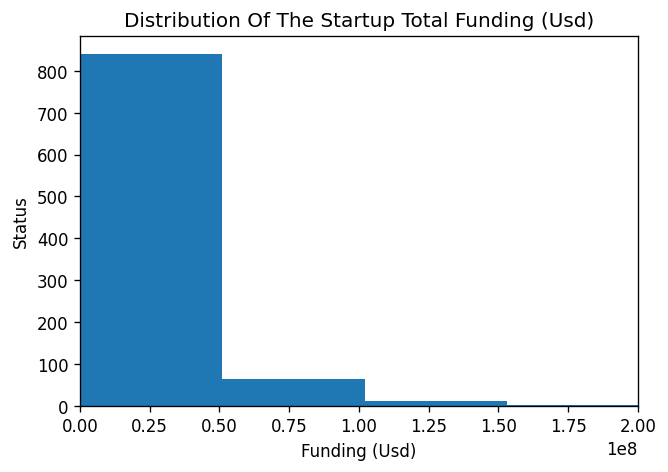

In [57]:
labelling(startup_data.funding_total_usd, kind='hist', title="Distribution of the startup total funding (usd)", y = "status",
          x="funding (usd)", text=False)
plt.xlim(0, 2e8);

By examining the graph displayed above, it becomes evident that the majority of companies receive funding amounts of less than 10 million dollars. This is very interesting information.

Let's proceed with our exploration.

In [58]:
# Creating a dataframe of the success rates of all the states
milestones_success_rates = success_rate(startup_data, 'milestones')

<Figure size 720x480 with 0 Axes>

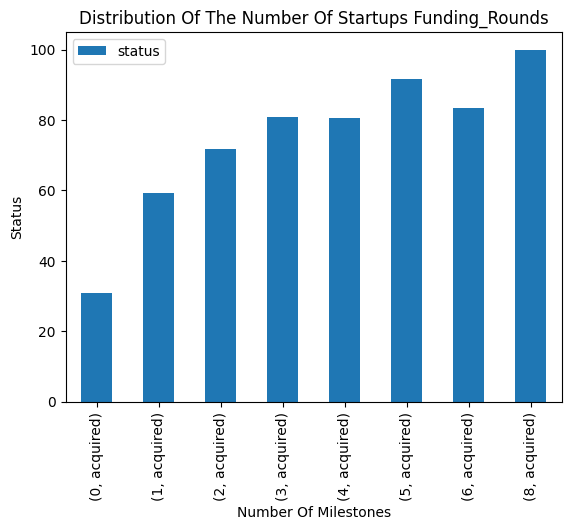

In [59]:
labelling(milestones_success_rates, kind='bar', title="Distribution of the number of startups funding_rounds", y = "status",
          x="number of milestones", text=False);

The graph presented above reinforces the notion that a company's success is positively correlated with the number of milestones it achieves. This trend is well-demonstrated in the graph.

With this insight in mind, let's proceed to examine the next column.

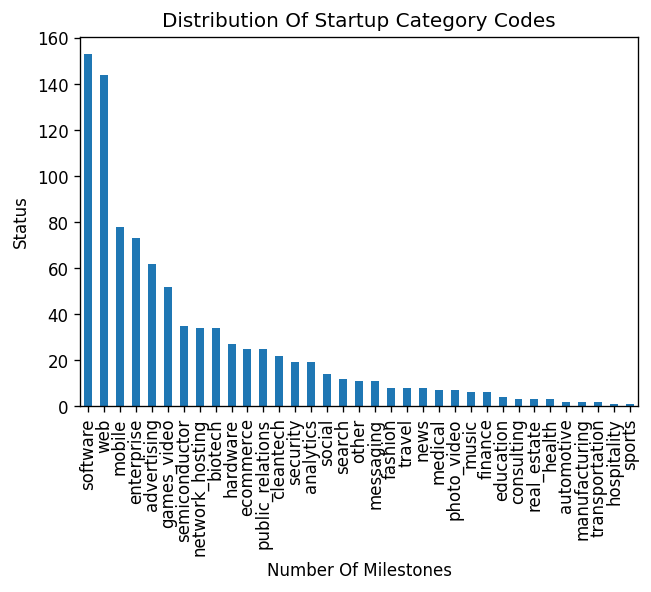

In [60]:
# let's start with the `category_code` column
labelling(startup_data.category_code.value_counts(), kind='bar', title="Distribution of startup category codes", y = "status",
          x="number of milestones", text=False);

Upon analyzing the graph displayed above, a clear trend emerges: the majority of startups in our dataset belong to the `software` category, with `web` and `mobile` following closely behind. This observation leads us to the compelling inference that the top three most prevalent startup concepts are technology-focused.

Now, our next logical step is to examine the success rates within these specific categories.

In [61]:
# Creating a dataframe of the success rates of category codes
categories_success_rates = success_rate(startup_data, 'category_code', complete=True)

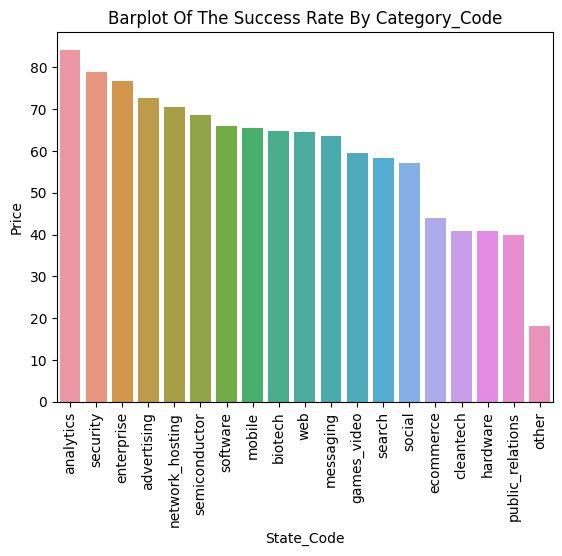

In [62]:
# Creating a barplot showing the success rate per state
sns.barplot(x='category_code', y='Success_rate', data=categories_success_rates.query("Count>10"))
plt.xticks(rotation=90)
labelling('', title='Barplot of the success rate by category_code', y = 'Price', x="state_code", text=False, draw=False);

In our dataset, the majority of startups fall within the software category, particularly in web and mobile technologies. Surprisingly, neither of these categories ranks among the top 5 most successful startup types. This observation provides valuable insights for aspiring entrepreneurs, emphasizing the need for critical thinking and strategic planning before embarking on a startup venture.

# Conclusion

In summary, our analysis has revealed several key findings from the dataset, contributing to a better understanding of the underlying trends and dynamics:

1. **Startup Success Rates:** The majority of startups in our dataset have achieved success, highlighting a significant disparity between successful and unsuccessful ventures. This insight serves as a valuable foundation for data-driven decision-making and further analysis.

2. **Geographic Hotspots:** California, New York, and Massachusetts emerge as prominent regions with a high concentration of startups, suggesting these areas as potential commercial hubs.

3. **State-specific Success:** While California boasts a lower closure rate than the dataset average, further analysis is needed to understand the overall success rates in various states.

4. **Success Rates by State:** Massachusetts and Colorado lead in startup success rates, providing valuable insights for aspiring entrepreneurs.

5. **Temporal Trends:** There are notable temporal trends, such as a surge in startups founded in January and changes in startup closure rates over the years, which warrant further investigation.

6. **Funding and Success:** Startups with more funding rounds tend to have a higher likelihood of success, up to a certain point.

7. **Startup Categories:** Software, web, and mobile technology dominate the startup landscape, yet they don't rank among the top 5 most successful categories, emphasizing the need for strategic planning.

# Limitations
However, it's important to acknowledge the limitations of our analysis:

1. **Data Completeness:** The dataset may lack certain critical columns, hindering a comprehensive understanding of success factors. Factors like amenities, infrastructure, or proximity to commercial areas could provide valuable insights but are absent.

2. **Dataset Size:** The dataset's size and prevalence of missing values have restricted the depth of our analysis, potentially limiting the generalizability of our findings.

3. **Temporal Trends:** While we've observed temporal trends, further analysis is needed to identify the driving factors behind these trends.

4. **Causality:** Our analysis identifies correlations, but establishing causality requires more in-depth investigation and controlled experiments.

5. **Geographical Granularity:** The dataset might lack granularity for a more detailed geographic analysis, which could offer more specific insights.

These limitations underscore the need for continued research and data collection to enhance our understanding of startup success factors and trends.


# Saving of Cleaned Dataframe

In [63]:
startup_data.drop(columns="closed_at").to_csv("./data/Cleaned_startup_data.csv", index=False)